In [374]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [375]:
df = pd.read_csv('Jamboree_Admission.csv')

In [376]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Column Profiling:

#### Target/dependent variable = Chance of Admit

1. Serial No. (Unique row ID)
2. GRE Scores (out of 340)
3. TOEFL Scores (out of 120)
4. University Rating (out of 5)
5. Statement of Purpose and Letter of Recommendation Strength (out of 5)
6. Undergraduate GPA (out of 10)
7. Research Experience (either 0 or 1)
8. Chance of Admit (ranging from 0 to 1)

In [377]:
df.rename(columns = {'Chance of Admit ':'Chance of Admit'}, inplace = True)
df.rename(columns = {'LOR ':'LOR'}, inplace = True)

In [378]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [379]:
df.shape

(500, 9)

In [380]:
# There is a huge difference in range. Gre and toefl numbers appear to be much higher as compared 
# to other features. 
# Also the std in all the features is very less. Seems like there might be no outliers at all. 
df.describe().T.drop('count', axis = 1).drop('Serial No.')

,mean,std,min,25%,50%,75%,max
GRE Score,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [381]:
# Every feature is either an integer or float Dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [382]:
# No null values found
df.isnull().sum(axis = 0)/df.shape[0]

Serial No.           0.0
GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

In [383]:
# dropping unique row identifier
df.drop('Serial No.', axis = 1, inplace = True)

In [384]:
# No duplicate rows found
df.duplicated().value_counts()

False    500
dtype: int64

In [385]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


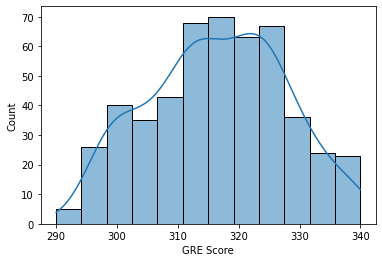

Unique values are [337 324 316 322 314 330 321 308 302 323 325 327 328 307 311 317 319 318
 303 312 334 336 340 298 295 310 300 338 331 320 299 304 313 332 326 329
 339 309 315 301 296 294 306 305 290 335 333 297 293]
Unique value count is 49


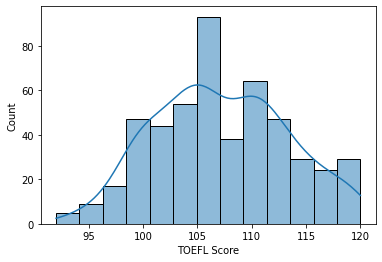

Unique values are [118 107 104 110 103 115 109 101 102 108 106 111 112 105 114 116 119 120
  98  93  99  97 117 113 100  95  96  94  92]
Unique value count is 29


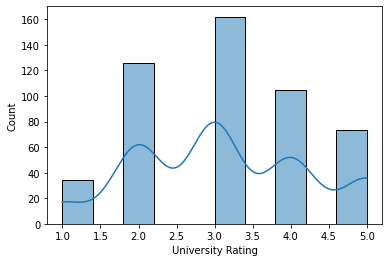

Unique values are [4 3 2 5 1]
Unique value count is 5


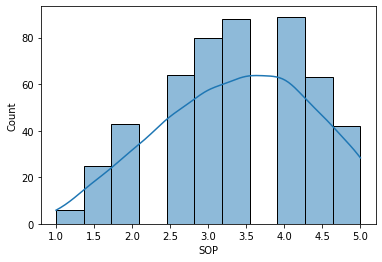

Unique values are [4.5 4.  3.  3.5 2.  5.  1.5 1.  2.5]
Unique value count is 9


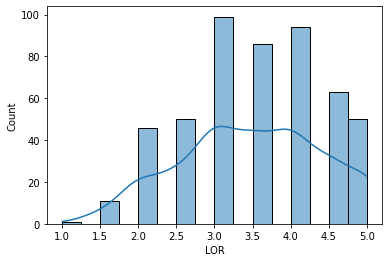

Unique values are [4.5 3.5 2.5 3.  4.  1.5 2.  5.  1. ]
Unique value count is 9


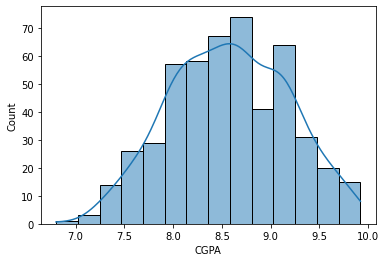

Unique values are [9.65 8.87 8.   8.67 8.21 9.34 8.2  7.9  8.6  8.4  9.   9.1  8.3  8.7
 8.8  8.5  9.5  9.7  9.8  9.6  7.5  7.2  7.3  8.1  9.4  9.2  7.8  7.7
 9.3  8.85 7.4  7.6  6.8  8.92 9.02 8.64 9.22 9.16 9.64 9.76 9.45 9.04
 8.9  8.56 8.72 8.22 7.54 7.36 8.02 9.36 8.66 8.42 8.28 8.14 8.76 7.92
 7.66 8.03 7.88 7.84 8.96 9.24 8.88 8.46 8.12 8.25 8.47 9.05 8.78 9.18
 9.46 9.38 8.48 8.68 8.34 8.45 8.62 7.46 7.28 8.84 9.56 9.48 8.36 9.32
 8.71 9.35 8.65 9.28 8.77 8.16 9.08 9.12 9.15 9.44 9.92 9.11 8.26 9.43
 9.06 8.75 8.89 8.69 7.86 9.01 8.97 8.33 8.27 7.98 8.04 9.07 9.13 9.23
 8.32 8.98 8.94 9.53 8.52 8.43 8.54 9.91 9.87 7.65 7.89 9.14 9.66 9.78
 9.42 9.26 8.79 8.23 8.53 8.07 9.31 9.17 9.19 8.37 7.68 8.15 8.73 8.83
 8.57 9.68 8.09 8.17 7.64 8.01 7.95 8.49 7.87 7.97 8.18 8.55 8.74 8.13
 8.44 9.47 8.24 7.34 7.43 7.25 8.06 7.67 9.54 9.62 7.56 9.74 9.82 7.96
 7.45 7.94 8.35 7.42 8.95 9.86 7.23 7.79 9.25 9.67 8.86 7.57 7.21 9.27
 7.81 7.69]
Unique value count is 184


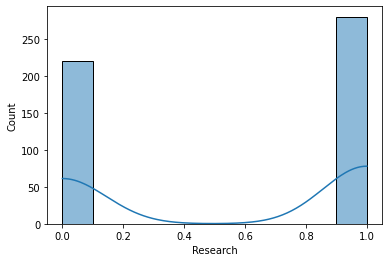

Unique values are [1 0]
Unique value count is 2


In [386]:
# Columns University Rating, SOP, LOR and Research appear to be ordinal categorical variables and
# rest are continuos variables
for i in df.columns[:-1]:
    sns.histplot(df[i], kde = True)
    plt.show()
    print(f'\033[1mUnique values\033[0m are {df[i].unique()}')
    print(f'\033[1mUnique value count\033[0m is {len(df[i].unique())}')

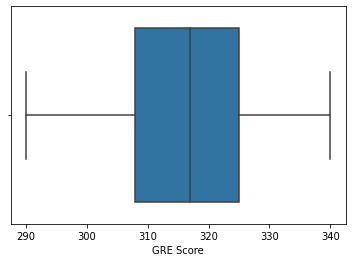

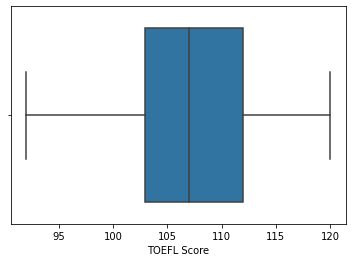

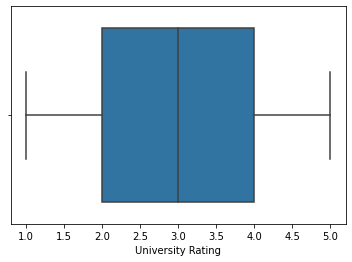

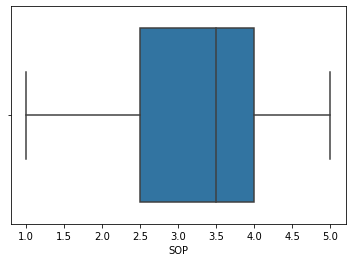

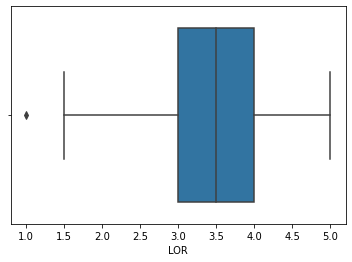

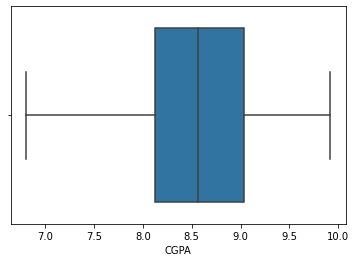

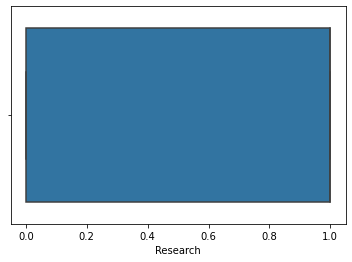

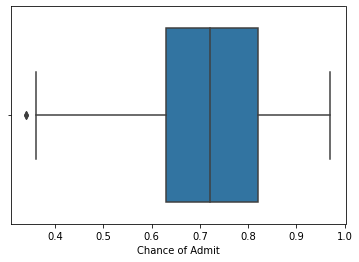

In [387]:
# Almost no outliers found in the data given
for j in df.columns:
    sns.boxplot(df[j])
    plt.show() 

In [388]:
discreet = df.columns[[2,3,4,6]]
continuos = df.columns[[0,1,5]]

In [389]:
for i in discreet:
    print(df[i].value_counts())

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64
4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: SOP, dtype: int64
3.0    99
4.0    94
3.5    86
4.5    63
2.5    50
5.0    50
2.0    46
1.5    11
1.0     1
Name: LOR, dtype: int64
1    280
0    220
Name: Research, dtype: int64


In [390]:
# lets drop a row in LOR where the value is 1. This can be seen as an outlier as per boxplot.
df = df[df['LOR'] != 1]

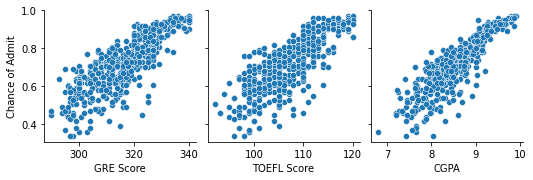

In [391]:
# We can see an almost linear relationship between target and independent variables
# higher the continuos independent values, higher is the chance of admit
sns.pairplot(df, x_vars=continuos, y_vars='Chance of Admit')
plt.show()

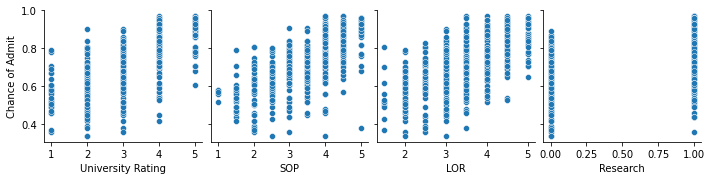

In [392]:
# A relationship exists but cannot clearly be seen from these plots
sns.pairplot(df, x_vars=discreet, y_vars='Chance of Admit')
plt.show()

<AxesSubplot:>

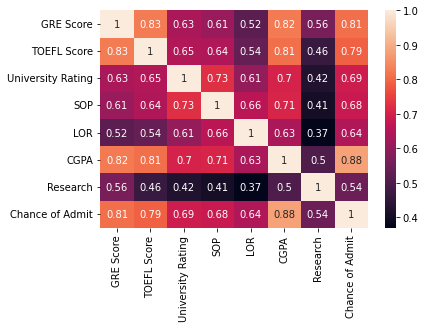

In [393]:
# Checking the correlation between the features
sns.heatmap(df.corr(), annot = True)

In [394]:
# Highest correlation with chance of admit is observed in CGPA
df.corr().loc['Chance of Admit',:].sort_values(ascending = False).iloc[1:]

CGPA                 0.881379
GRE Score            0.809371
TOEFL Score          0.790276
University Rating    0.687712
SOP                  0.680901
LOR                  0.641427
Research             0.544227
Name: Chance of Admit, dtype: float64

<AxesSubplot:>

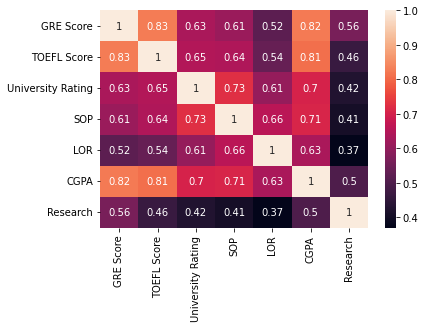

In [395]:
# Checking correlation without target variable
sns.heatmap(df.drop('Chance of Admit', axis = 1).corr(), annot = True)
# Higher correlation observed between CGPA vs TOEFL Score, CGPA vs GRE score and TOEFL vs GRE. 
# From above since CGPA has higher correlation with chance of admit, we can drop GRE and TOEFL columns
# during modelling.

### Scaling the data

In [396]:
df['Chance of Admit'].describe()

count    499.000000
mean       0.722345
std        0.140632
min        0.340000
25%        0.630000
50%        0.720000
75%        0.820000
max        0.970000
Name: Chance of Admit, dtype: float64

In [397]:
from sklearn.preprocessing import MinMaxScaler

In [398]:
#Since, there were rarely any outliers found, we can use Minmax scaling to normalize our data
scale = MinMaxScaler()
scale.fit(df)
scaled_val = scale.transform(df)
scaled_df = pd.DataFrame(columns=df.columns, data = scaled_val)

In [399]:
scaled_df.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,0.75,0.875,0.857143,0.913462,1.0,0.920635
1,0.68,0.535714,0.75,0.750,0.857143,0.663462,1.0,0.666667


In [428]:
for i in scaled_df.columns:
    print(max(scaled_df[i]), min(scaled_df[i]))

1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
0.9999999999999998 0.0
1.0 0.0
1.0 0.0
1.0 0.0


#### Splitting the data_frame to get training and test sets

In [400]:
from sklearn.model_selection import train_test_split

In [401]:
# Initializing x(d independent features with n rows) and y(target variable)
train_df, test_df = train_test_split(scaled_df, train_size=0.8)

In [402]:
train_df.shape, test_df.shape

((399, 8), (100, 8))

#### Defining training and testing x and y variables. 
- x being a set of independent varables and y is a target variable
- As the no. of data points are very less we need to go with K-fold cross validation.
- Let k or alpha value be 10

In [403]:
# We will not use test data sets until the testing phase
x_test, y_test = test_df.iloc[:,:-1], test_df.iloc[:,-1]
x_train, y_train = train_df.iloc[:,:-1], train_df.iloc[:,-1]

### Modelling

#### Importing statsmodel api and training a Regression model. We will also check feature importance from statsmodel summary

In [412]:
import statsmodels.api as sm
# adding constant or intercept which is one
x_lr = sm.add_constant(x_train)

In [413]:
x_lr.head(2)

,const,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
322,1.0,0.48,0.535714,0.25,0.375,0.714286,0.471154,0.0
415,1.0,0.50,0.428571,0.50,0.750,0.285714,0.416667,0.0


In [414]:
# training the OLS(Ordindary Least Squares) model on training x_lr and y_train dataset
x_lr_ols = sm.OLS(y_train, x_lr).fit()

In [415]:
x_lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.9
Date:                Fri, 12 Aug 2022   Prob (F-statistic):          1.03e-141
Time:                        19:31:10   Log-Likelihood:                 370.98
No. Observations:                 399   AIC:                            -726.0
Df Residuals:                     391   BIC:                            -694.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0224      0.016      1.432      0.153      -0.008       0.053
GRE Score             0.1235      0.046      2.706      0.007       0.034       0.213
TOEFL Score           0.1449      0.044      3.292      0.001       0.058       0.232
University Rating     0.0314      0.027      1.153      0.250      -0.022       0.085
SOP                   0.0118      0.032      0.368      0.713      -0.051       0.075
LOR                   0.0726      0.025      2.889      0.004       0.023       0.122
CGPA                  0.6025      0.056     10.728      0.000       0.492       0.713
Research              0.0543      0.012      4.598      0.000       0.031       0.078
==============================================================================
Omnibus:                       85.983   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.839
Skew:                          -1.099   Prob(JB):                     1.34e-42
Kurtosis:                       5.602   Cond. No.                         24.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Inference from above summary
- R2 and adj. R2 for our training data came out to be 0.821 and 0.818 respectively. 
(We cannot come to any conclusion unless we predict using our test data)

- Checking statistical signficance of the coefficients using t-test statistic.  
==> Null hypothesis: A coefficient is almost close to zero.  
==> Alternate Hypothesis: A coefficient is non-zero.

- Let significance level α = 5% or p-val = 0.05

- We can see that only university rating and SOP features have pval > 0.05 and their t-statistics are almost close to 0.

- Hence, we fail to reject null hypothesis thereby concluding university rating and SOP has almost no significance on target variable.

- Though we see that other features are statistically significant, there might be MultiCollinearity amongst them.

In [416]:
# Now checking the performance of our model using test data
y_test_pred = x_lr_ols.predict(sm.add_constant(x_test))
R2_test = 1 - np.sum((y_test - y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2)
R2_test

0.8100286861030617

### Optimising our Model
- Using scikit-learn to train our Linear Regression model
- We will also extend our regression to polynomial to check if we can get a fit better than linear. 
- Let maximum number of degrees be 5

In [404]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

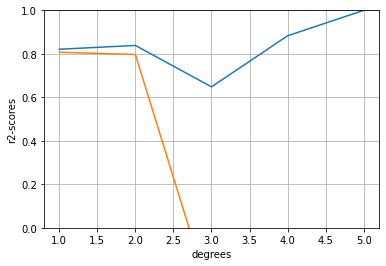

In [405]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True)
degrees = 5
train_scores = []
cv_scores = []

for degree in range(1, degrees+1):
    kfold_train_scores = []
    kfold_cv_scores = []

    for train_index, cval_index in kf.split(x_train):
        
        #Creating new splits every iteration
        x_train_new, y_train_new = x_train.iloc[train_index], y_train.iloc[train_index]
        x_cv, y_cv = x_train.iloc[cval_index], y_train.iloc[cval_index]
        
        #Creating a pipline to add polynomial features and create an LR model. 
        polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        polyreg.fit(x_train_new, y_train_new) #training the model

        #Calculating r2scores
        train_score = polyreg.score(x_train_new, y_train_new)
        cv_score = polyreg.score(x_cv, y_cv)
        
        kfold_train_scores.append(train_score) 
        kfold_cv_scores.append(cv_score)
    
    train_scores.append(np.mean(kfold_train_scores))
    cv_scores.append(np.mean(kfold_cv_scores))

sns.lineplot(np.arange(1,6,1), train_scores)
sns.lineplot(np.arange(1,6,1), cv_scores)
plt.xlabel('degrees')
plt.ylabel('r2-scores')
plt.ylim(0,1)
plt.grid()
plt.show()

#### From the graph above we can clearly see that linear model(degree 1) is our best model as we get the highest r2 score on the test data. 

In [406]:
max(train_scores), max(cv_scores)

(1.0, 0.8073322122218638)

#### Hyperparameter tuning is done to get the best possible alpha or lambda value so that we can use ridge regression to avoid overfit (if any)

In [407]:
from sklearn.linear_model import Ridge

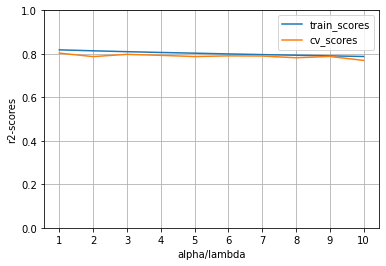

In [408]:
kf = KFold(n_splits=10, shuffle=True)
alpha = 10
train1_scores = []
cv1_scores = []

for alphas in range(1, alpha+1):
    kfold_train_scores = []
    kfold_cv_scores = []

    for train_index, cval_index in kf.split(x_train):
        
        #Creating new splits every iteration
        x_train_new, y_train_new = x_train.iloc[train_index], y_train.iloc[train_index]
        x_cv, y_cv = x_train.iloc[cval_index], y_train.iloc[cval_index]
        
        #Creating ridge model 
        ridgereg = Ridge(alphas)
        ridgereg.fit(x_train_new, y_train_new) #training the model

        #Calculating r2scores
        train_score = ridgereg.score(x_train_new, y_train_new)
        cv_score = ridgereg.score(x_cv, y_cv)
        
        kfold_train_scores.append(train_score) 
        kfold_cv_scores.append(cv_score)
    
    train1_scores.append(np.mean(kfold_train_scores))
    cv1_scores.append(np.mean(kfold_cv_scores))

sns.lineplot(np.arange(1,11,1), train1_scores, label = 'train_scores')
sns.lineplot(np.arange(1,11,1), cv1_scores, label = 'cv_scores')
plt.xlabel('alpha/lambda')
plt.ylabel('r2-scores')
plt.legend()
plt.ylim(0,1)
plt.xticks(np.arange(1,11,1))
plt.grid()
plt.show()

In [409]:
[max(train1_scores), np.argmax(np.array(train1_scores))+1], [max(cv1_scores), np.argmax(np.array(cv1_scores))+1]

([0.8183863766191296, 1], [0.8034354627308543, 1])

#### The best value of alpha associated with the highest r2 score of our cross validated data is 1
- We will again train a new model on ridge regression with polynomial degree as 1 and lambda value of 1.
- Testing will be done on the unseen test data set. 

In [410]:
kf = KFold(n_splits=10, shuffle=True)
alpha = 1
train2_scores = []
cv2_scores = []
test_scores = []

for train_index, cval_index in kf.split(x_train):
        
        #Creating new splits every iteration
        x_train_new, y_train_new = x_train.iloc[train_index], y_train.iloc[train_index]
        x_cv, y_cv = x_train.iloc[cval_index], y_train.iloc[cval_index]
        
        #Creating ridge model 
        bestreg = Ridge(alpha)
        bestreg.fit(x_train_new, y_train_new) #training the model

        #Calculating r2scores
        train_score = bestreg.score(x_train_new, y_train_new)
        cv_score = bestreg.score(x_cv, y_cv)
        test_score = bestreg.score(x_test, y_test)
        
        train2_scores.append(train_score) 
        cv2_scores.append(cv_score)
        test_scores.append(test_score)
        
print(np.mean(train2_scores), np.mean(cv2_scores), np.mean(test_scores))

0.8182900642347191 0.8061774571076767 0.8093717048560164


### Hence we can conclude that bestreg is the LR model with high performance. 
- Test r2 score = 0.809

In [411]:
# Weights for all the features. CGPA has the highest importance and SOP the lowest.
pd.DataFrame(data={'features':x_test.columns, 'weights':bestreg.coef_}).sort_values(by='weights', ascending=False)

,features,weights
5,CGPA,0.478393
1,TOEFL Score,0.173951
0,GRE Score,0.132639
4,LOR,0.077293
6,Research,0.061430
2,University Rating,0.045297
3,SOP,0.036178


### Testing the assumptions of the linear regression model

#### Multicollinearity check using VIF score

In [417]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [418]:
vif = pd.DataFrame()
vif['features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.reset_index(inplace = True)
vif.drop('index', inplace = True, axis = 1)
vif
# We can see that all the features except research have VIF value more than 5. We can't just drop all the features and predict
# the model the target just on research. Hence 

,features,VIF
0,CGPA,40.33
1,GRE Score,29.34
2,TOEFL Score,28.27
3,SOP,17.59
4,University Rating,11.35
5,LOR,10.49
6,Research,3.34


#### Lets drop the features one by one in the descending order of their VIF scores until LOR(VIF>5) and predict the r2 scores of training dataset.

In [419]:
x_new = x_train
r2scores = {}
for i in range(x_train.shape[1]-1):
    x_new = x_new.drop(vif.loc[i, 'features'], axis = 1)
    vif_model = LinearRegression()
    vif_model.fit(x_new, y_train)
    r2scores[', '.join(x_new.columns)] = vif_model.score(x_new, y_train)

In [420]:
# We can see that if we start dropping columns with VIF score > 5, r2 scores are decreasing drastically. 
# In the end we will be left with just 0.27 which is a huge underfit. Hence, we have to keep all the features even if they are
# collinear with one another to get the best performance.
r2scores

{'GRE Score, TOEFL Score, University Rating, SOP, LOR, Research': 0.7681014049759626,
 'TOEFL Score, University Rating, SOP, LOR, Research': 0.7372113806767033,
 'University Rating, SOP, LOR, Research': 0.6267060683250976,
 'University Rating, LOR, Research': 0.6056840784572752,
 'LOR, Research': 0.5129174858439269,
 'Research': 0.3141694236935413}

#### Checking the mean of residuals on our best fit which is bestreg

In [421]:
# We can see that the residual mean is almost close to 0.
# Assumption satisfied
residuals = y_test - bestreg.predict(x_test)
np.mean(residuals)

0.00692131924461274

#### Linearity of variables 

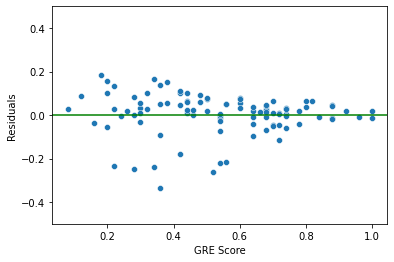

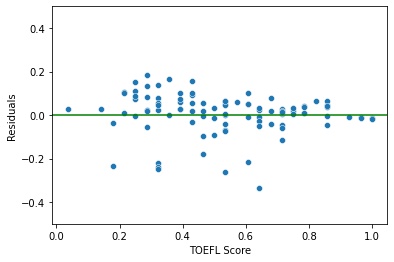

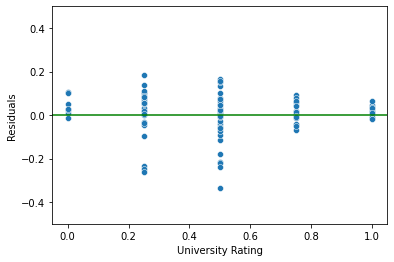

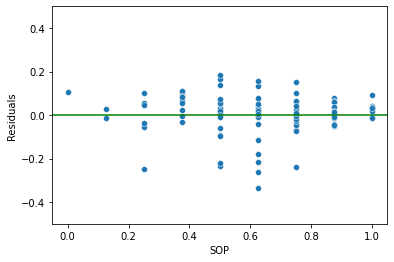

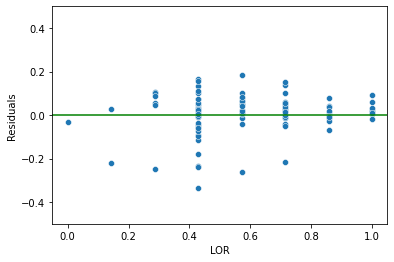

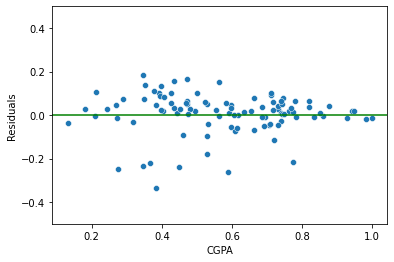

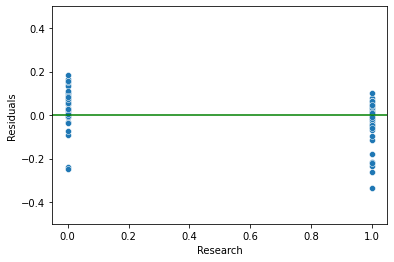

In [422]:
# In all the plots we can see that a high density of points are close to the origin. This explains mean residual = 0.
# We also cannot see any pattern associated with any of the independent variables. 
for i in range(x_test.shape[1]):
    sns.scatterplot(x_test.iloc[:, i], residuals)
    plt.axhline(y=0, color='g', linestyle='-')
    plt.ylim(-0.5, 0.5)
    plt.ylabel('Residuals')
    plt.show()

#### Test for Homoscedasticity

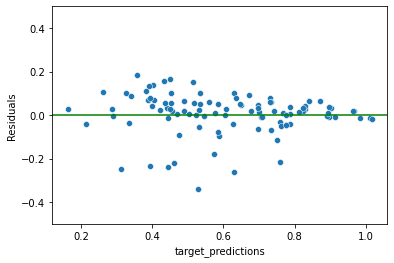

In [423]:
# lets plot a graph between predicted target and residual values. We can see that the variance from the 0 line is almost same
# across all values of prediction.
sns.scatterplot(bestreg.predict(x_test), residuals)
plt.axhline(y=0, color='g', linestyle='-')
plt.ylim(-0.5, 0.5)
plt.ylabel('Residuals')
plt.xlabel('target_predictions')
plt.show()
# No heteroscedasticity found

#### Normality of residuals

<AxesSubplot:xlabel='Chance of Admit', ylabel='Density'>

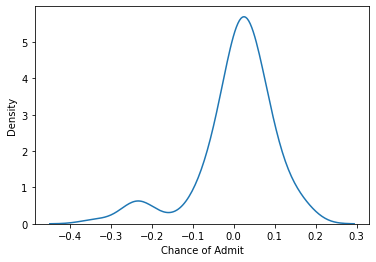

In [424]:
# We can almost see that the residuals plot is following a normal distriution but we will test it. 
sns.kdeplot(residuals)

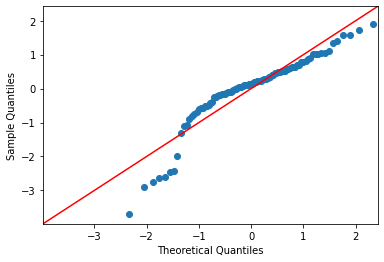

In [425]:
# We can see that the points are almost on the 45deg line
sm.qqplot(residuals, line='45', fit = True)
plt.show()